### Import Necessary Libraries

In [29]:
import pandas as pd                         #For data manipulation and data analysis
import numpy as np                          #For numerical calculation
import matplotlib.pyplot as plt             #For Data Visualization
import seaborn as sns                       #For Data Visualization
import warnings                             #For Avoid unwanted warnings
warnings.filterwarnings("ignore")

### DATA OVERVIEW:
The dataset contains 399 rows of 9 features

The dataset consists of the following columns:

          Name: Unique identifier for each automobile.
    
          MPG: Fuel efficiency measured in miles per gallon.
    
          Cylinders: Number of cylinders in the engine.
    
          Displacement: Engine displacement, indicating its size or capacity. 
    
          Horsepower: Power output of the engine.
    
          Weight: Weight of the automobile.
    
          Acceleration: Capability to increase speed, measured in seconds.
    
          Model Year: Year of manufacture for the automobile model.
    
          Origin: Country or region of origin for each automobile.

### Load the dataset

In [30]:
#Loading the dataset
df=pd.read_csv(r"C:\Users\pushp\Downloads\Automobile.csv")

In [31]:
#top five records
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [32]:
#shape
df.shape

(398, 9)

Total no. of Rows=398.

Total no. of Columns=9.

In [33]:
#exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### EDA [Exploratory Data Analysis]

**Check for duplicates records**

In [34]:
#Check whether we have duplicates 
df[df.duplicated()]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin


No duplicates records .

**Checking for null values**

In [35]:
#check whether we have null values in the data or not.
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

We can see that horsepower feature have 6 null values.

In [36]:
df[df["horsepower"].isnull()]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,usa
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,usa
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,usa
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,europe
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,usa


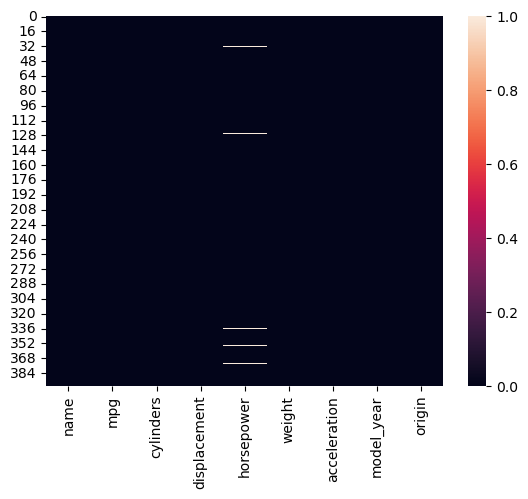

In [37]:
# will visualize it
sns.heatmap(df.isnull())
plt.show()

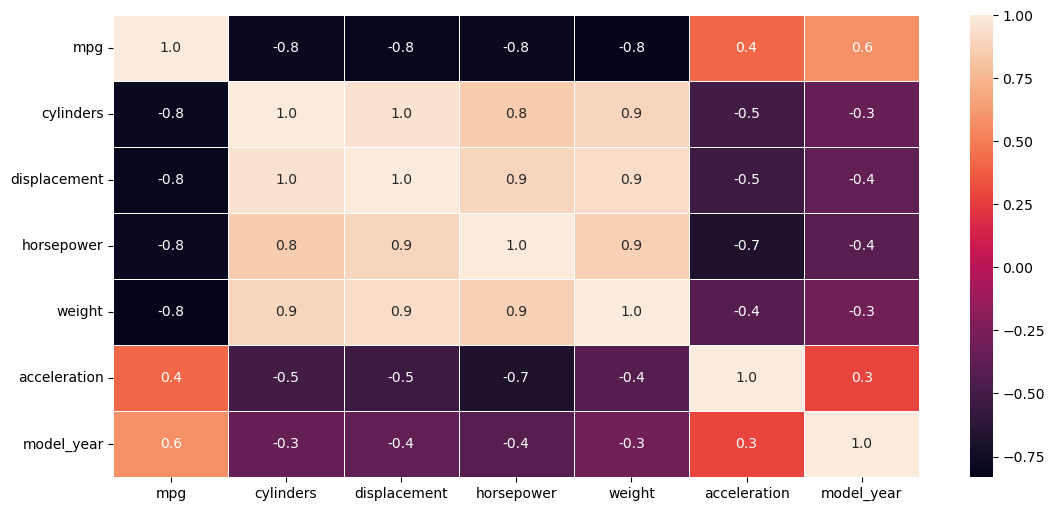

In [38]:
f,ax = plt.subplots(figsize=(13, 6))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

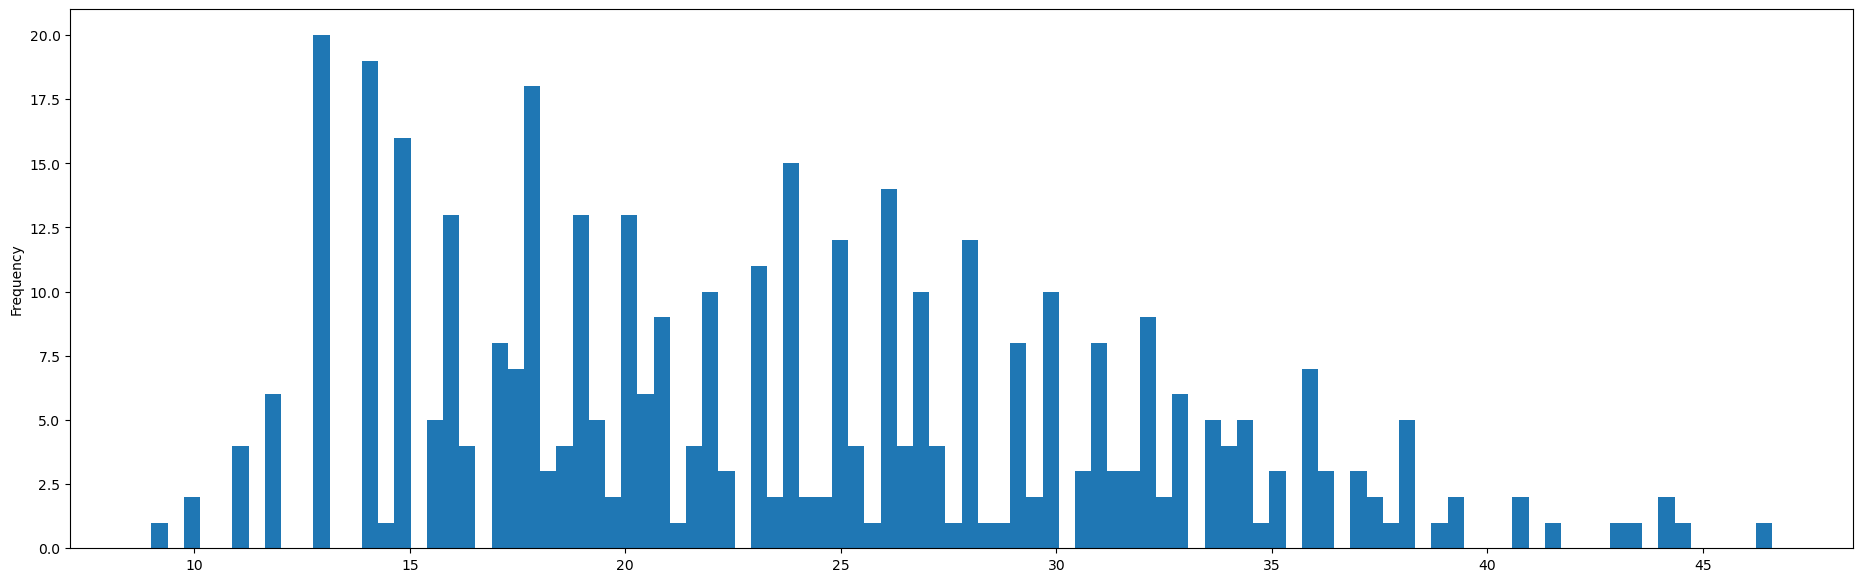

In [39]:
# Histogram
df.mpg.plot(kind='hist', bins=100, figsize=(23,7))
plt.show()

In [40]:
df[df.mpg==25.0][["mpg","horsepower"]]

,mpg,horsepower
20,25.0,87.0
22,25.0,95.0
31,25.0,95.0
32,25.0,NaN
58,25.0,80.0
132,25.0,75.0
172,25.0,71.0
180,25.0,115.0
183,25.0,81.0
184,25.0,92.0


In [41]:
df[df.mpg==25.0][["mpg","horsepower"]].mean()

mpg           25.0
horsepower    90.1
dtype: float64

In [42]:
grouped_horsepower=df.pivot_table(values="horsepower",index="mpg")     #pivot table gives mean
grouped_horsepower

,horsepower
mpg,
9.0,193.00
10.0,207.50
11.0,187.00
12.0,185.00
13.0,158.35
...,...
43.4,48.00
44.0,52.00
44.3,48.00


In [43]:
grouped_horsepower.loc[25.0,:]

horsepower    90.1
Name: 25.0, dtype: float64

In [44]:
# now will find the missing data in the horsepower column

miss_idx=df[df["horsepower"].isnull()].index
miss_idx

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [45]:
df["mpg"]

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [46]:
for i,mpg in enumerate (df["mpg"]):
    if i in miss_idx:
        if mpg in grouped_horsepower.index:
            df["horsepower"][i]=grouped_horsepower.loc[mpg]["horsepower"]

In [47]:
df[df["horsepower"].isnull()]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,usa


In [48]:
df[(df.mpg==40.9)|(df.mpg==23.6)]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,usa


In [49]:
df[df.horsepower<60]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
19,volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,europe
59,volkswagen type 3,23.0,4,97.0,54.0,2254,23.5,72,europe
102,volkswagen super beetle,26.0,4,97.0,46.0,1950,21.0,73,europe
117,fiat 128,29.0,4,68.0,49.0,1867,19.5,73,europe
144,toyota corona,31.0,4,76.0,52.0,1649,16.5,74,japan
181,honda civic cvcc,33.0,4,91.0,53.0,1795,17.5,75,japan
195,chevrolet chevette,29.0,4,85.0,52.0,2035,22.2,76,usa
198,honda civic,33.0,4,91.0,53.0,1795,17.4,76,japan
218,renault 5 gtl,36.0,4,79.0,58.0,1825,18.6,77,europe
244,volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,78,europe


we have to fill the null values by seeing df[df.horsepower<60] table.  (means take reference from this table).

for mpg=23.6 take horsepower=54.0 and mpg=40.9 take horsepower=48.0

In [50]:
df["horsepower"][330]=48.0
df["horsepower"][336]=54.0

In [51]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

we treated all the missing values.

In [52]:
#shape
df.shape

(398, 9)

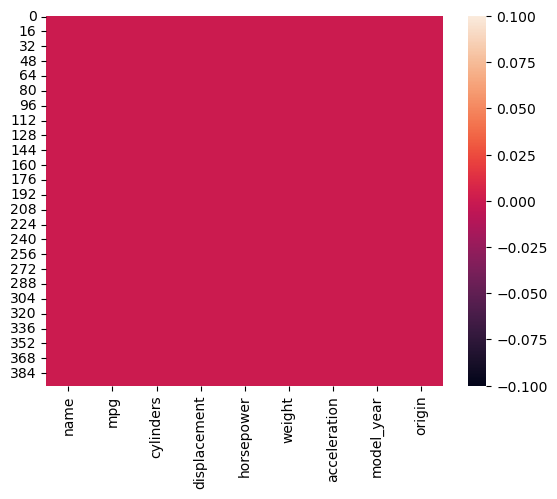

In [53]:
#will visualize it
sns.heatmap(df.isnull())
plt.show()

### Target Variable[mpg]

In [54]:
df.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<Axes: xlabel='mpg', ylabel='Density'>

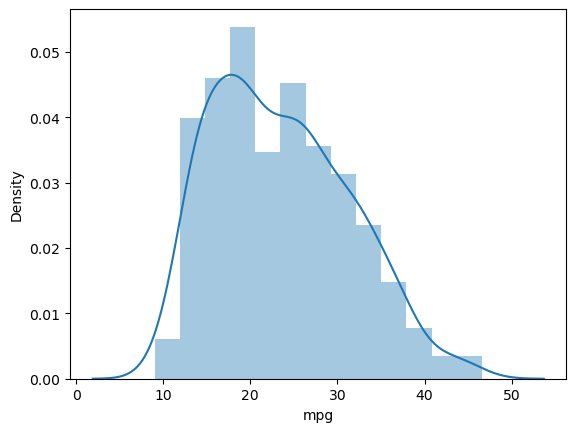

In [55]:
# Will check the distribution of the data
sns.distplot(df.mpg)

The data is almost normally distributed.

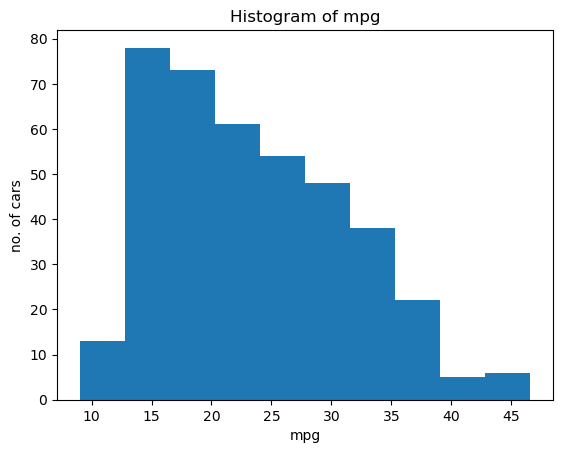

In [56]:
#histogram of mpg
plt.hist(df.mpg)
plt.title("Histogram of mpg")
plt.xlabel("mpg")
plt.ylabel("no. of cars")
plt.show()

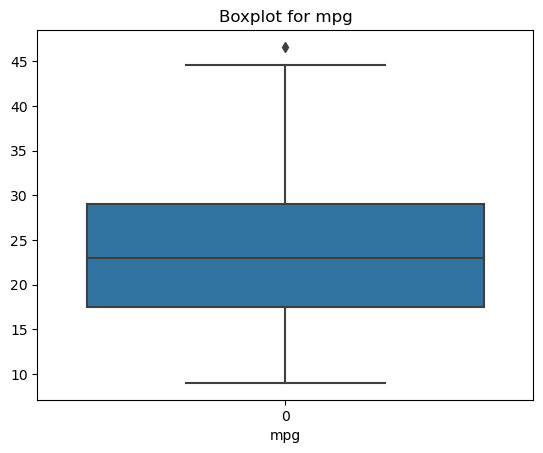

In [57]:
# Boxplot for mpg
sns.boxplot(df.mpg)
plt.title("Boxplot for mpg")
plt.xlabel("mpg")
plt.show()

### Now will check for outliers(if we have extreme outliers we need to drop the outliers).

In [58]:
# Now we are going to perform IQR [Inter Quartile Range] using IQR = Q3 - Q1
mpg_IQR=df.mpg.describe()["75%"]-df.mpg.describe()["25%"]
print("mpg_IQR=",mpg_IQR)

#Now will try to create HE and LE 
#HE=Q3+1.5*IQR
#LE=Q1-1.5*IQR
mpg_HE=df.mpg.describe()["75%"]+1.5*mpg_IQR
print("mpg_HE=",mpg_HE)
mpg_LE=df.mpg.describe()["25%"] - 1.5*mpg_IQR
print("mpg_LE=",mpg_LE)

mpg_IQR= 11.5
mpg_HE= 46.25
mpg_LE= 0.25


In [59]:
len(df.mpg[df.mpg> mpg_HE])

1

There are one outlier present in the data so we are ignoring it.

### Cylinder

In [60]:
df.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

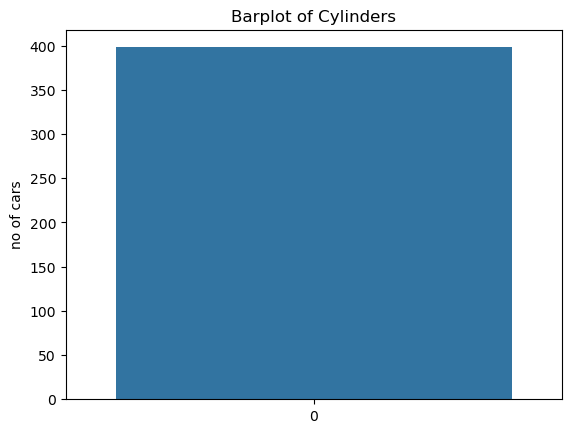

In [61]:
#barplot
sns.countplot(df.cylinders)
plt.ylabel("no of cars")
plt.title("Barplot of Cylinders")
plt.show()

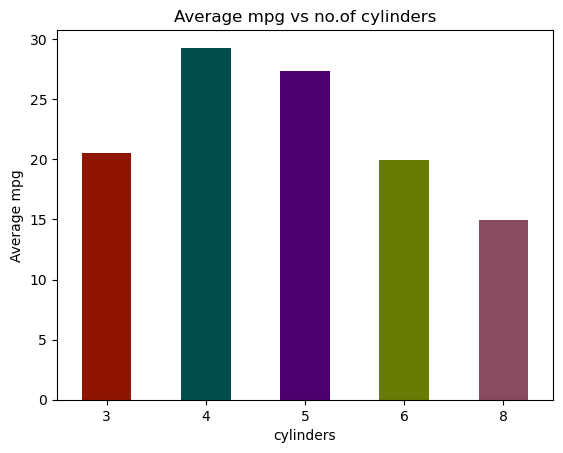

In [62]:
#mpg vs cylinder
df.groupby("cylinders")["mpg"].mean().plot(kind="bar",color=['#8f1402','#014d4e','#4b006e','#677a04','#874c62'])
plt.ylabel("Average mpg")
plt.xticks(rotation=0)
plt.title("Average mpg vs no.of cylinders")
plt.show()

In [63]:
df.groupby("cylinders")["mpg"].mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

In [64]:
# the above graph says that the average miliage of cars of 3 cylinders 20.55.
# the above graph says that the average miliage of cars of 4 cylinders 29.28.
# the above graph says that the average miliage of cars of 5 cylinders 27.36
# the above graph says that the average miliage of cars of 6 cylinders 19.98.
# the above graph says that the average miliage of cars of 8 cylinders 14.96.

### Displacement

In [65]:
df.displacement.describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

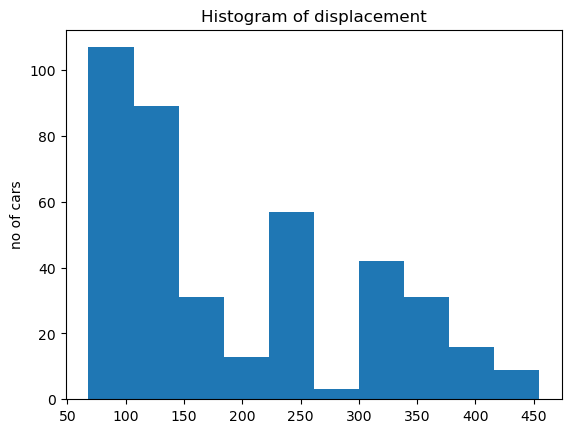

In [66]:
plt.hist(df.displacement)
plt.ylabel("no of cars")
plt.title("Histogram of displacement")
plt.show()

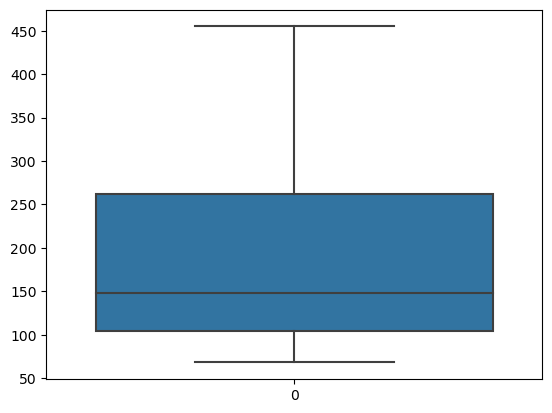

In [67]:
#boxplot
sns.boxplot(df.displacement)
plt.show()

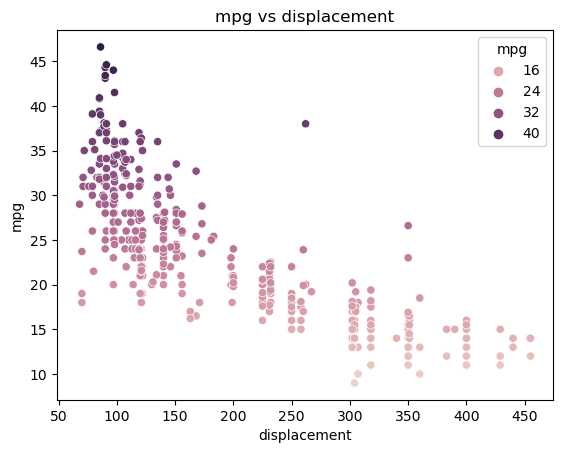

In [68]:
#Scatterplot of mpg vs displacement
sns.scatterplot(x="displacement",y="mpg",data=df,hue="mpg")
plt.title("mpg vs displacement")
plt.show()

**The plot tells that when the Displacement keep on increases mileage keeps on decreases its Negatively correlated.**

### Horsepower

In [69]:
pd.set_option("display.max_rows",None)
df.horsepower.unique

<bound method Series.unique of 0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
5      198.0
6      220.0
7      215.0
8      225.0
9      190.0
10     170.0
11     160.0
12     150.0
13     225.0
14      95.0
15      95.0
16      97.0
17      85.0
18      88.0
19      46.0
20      87.0
21      90.0
22      95.0
23     113.0
24      90.0
25     215.0
26     200.0
27     210.0
28     193.0
29      88.0
30      90.0
31      95.0
32      90.1
33     100.0
34     105.0
35     100.0
36      88.0
37     100.0
38     165.0
39     175.0
40     153.0
41     150.0
42     180.0
43     170.0
44     175.0
45     110.0
46      72.0
47     100.0
48      88.0
49      86.0
50      90.0
51      70.0
52      76.0
53      65.0
54      69.0
55      60.0
56      70.0
57      95.0
58      80.0
59      54.0
60      90.0
61      86.0
62     165.0
63     175.0
64     150.0
65     153.0
66     150.0
67     208.0
68     155.0
69     160.0
70     190.0
71      97.0
72     150.0
73     130.0
74     

In [70]:
# distribution in horse power
df.horsepower.describe()

count    398.000000
mean     104.005276
std       38.444543
min       46.000000
25%       75.000000
50%       92.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

In [71]:
df.horsepower.value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
75.0     14
95.0     14
70.0     13
105.0    12
67.0     12
65.0     10
97.0      9
85.0      9
145.0     7
140.0     7
80.0      7
92.0      6
68.0      6
78.0      6
84.0      6
72.0      6
180.0     5
60.0      5
71.0      5
86.0      5
115.0     5
130.0     5
175.0     5
170.0     5
83.0      4
120.0     4
76.0      4
165.0     4
52.0      4
48.0      4
112.0     3
190.0     3
125.0     3
215.0     3
63.0      3
96.0      3
225.0     3
69.0      3
74.0      3
129.0     2
98.0      2
198.0     2
53.0      2
81.0      2
79.0      2
89.0      2
153.0     2
58.0      2
139.0     2
54.0      2
62.0      2
87.0      2
160.0     2
155.0     2
91.0      2
46.0      2
149.0     1
132.0     1
64.0      1
116.0     1
77.0      1
142.0     1
135.0     1
66.0      1
138.0     1
133.0     1
103.0     1
107.0     1
108.0     1
158.0     1
220.0     1
113.0     1
200.0     1
210.0     1
193.0     1
90.1      1
208.0     1
137.0     1
167.

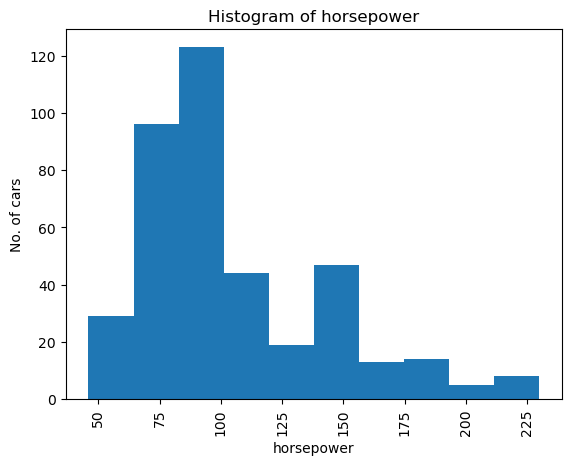

In [72]:
#histogram
plt.hist(df.horsepower)
plt.xlabel("horsepower")
plt.ylabel("No. of cars")
plt.xticks(rotation=90)
plt.title("Histogram of horsepower")
plt.show()

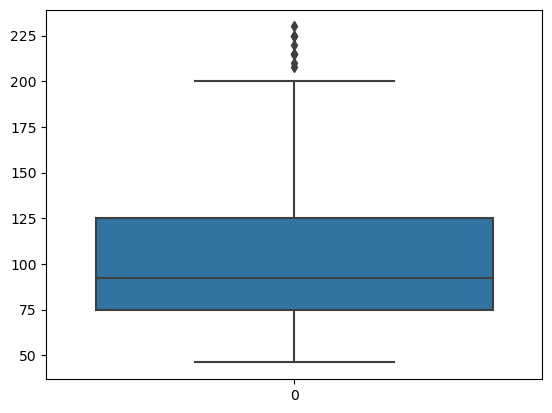

In [73]:
#boxplot
sns.boxplot(df.horsepower)
plt.show()

In [74]:
#checkin the outliers
horsepower_IQR=df.horsepower.describe()["75%"]-df.horsepower.describe()["25%"]
print("horsepower_IQR=",horsepower_IQR)

horsepower_HE=df.horsepower.describe()["75%"]+ 1.5*horsepower_IQR
print("horsepower_HE=",horsepower_HE)
horsepower_LE=df.horsepower.describe()["25%"]- 1.5*horsepower_IQR
print("horsepower_LE=",horsepower_LE)
len(df.horsepower[df.horsepower > horsepower_HE])

horsepower_IQR= 50.0
horsepower_HE= 200.0
horsepower_LE= 0.0


10

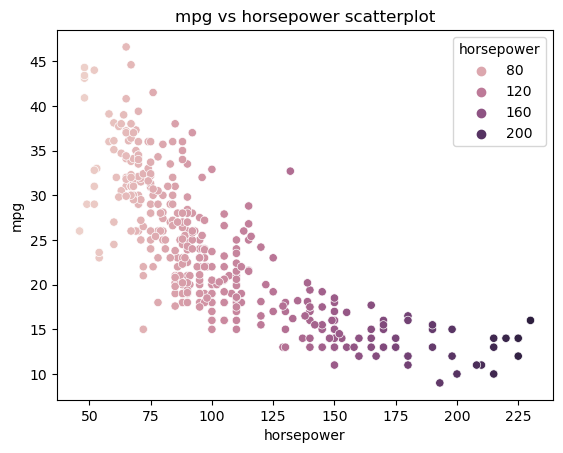

In [75]:
#Scatterplot 
sns.scatterplot(x="horsepower",y="mpg",data=df,hue="horsepower")
plt.title("mpg vs horsepower scatterplot")
plt.show()

**The plot tells that when the Horsepower keep on increases mileage keeps on decreases its Negatively correlated.**

### Weight

In [76]:
df.weight.describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

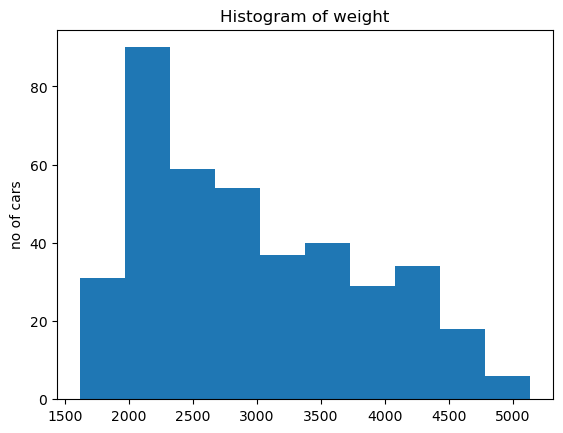

In [77]:
#Histogram
plt.hist(df.weight)
plt.ylabel("no of cars")
plt.title("Histogram of weight")
plt.show()

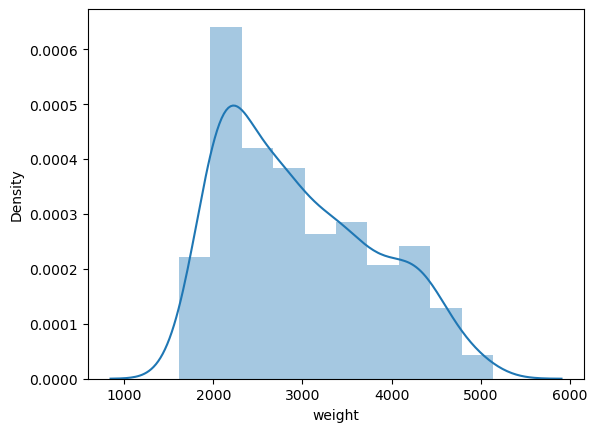

In [78]:
#will plot the distribution 
sns.distplot(df.weight)
plt.show()

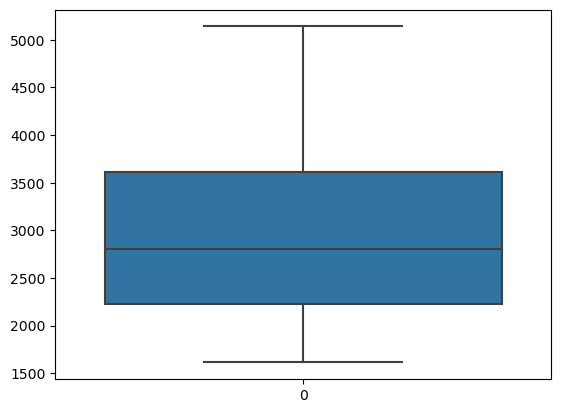

In [79]:
#boxplot
sns.boxplot(df.weight)
plt.show()

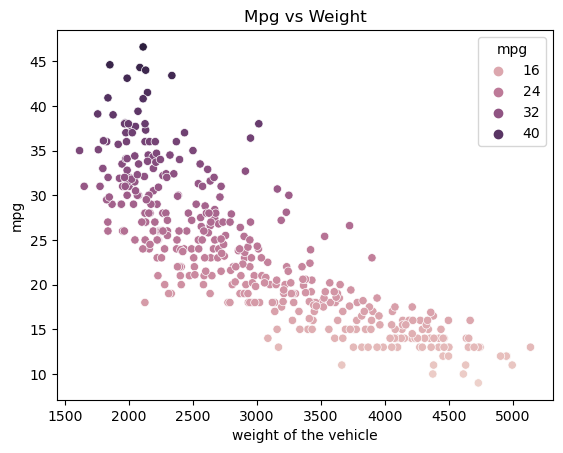

In [80]:
#Scatterplot between mpg and weight
sns.scatterplot(x="weight",y="mpg",data=df, hue="mpg")
plt.xlabel("weight of the vehicle")
plt.ylabel("mpg")
plt.title("Mpg vs Weight")
plt.show()

**The above plot tells when weight keep on increases mileage keep on decreases and its negatively correlated.**

### Acceleration

In [81]:
df.acceleration.value_counts()

14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
17.0    14
15.0    14
16.5    13
19.0    12
13.0    12
12.0    10
16.4     9
18.0     8
12.5     8
11.5     7
15.8     7
14.9     7
11.0     7
13.2     6
19.5     6
18.5     5
14.4     5
18.2     5
14.7     5
21.0     5
17.3     5
15.7     4
16.9     4
16.2     4
17.5     4
18.6     4
10.0     4
15.4     4
17.6     4
19.4     3
16.6     3
14.8     3
15.2     3
19.2     3
16.7     3
15.3     3
17.7     3
14.2     3
12.8     3
20.5     3
13.8     2
12.2     2
13.4     2
15.1     2
18.7     2
17.2     2
9.5      2
14.3     2
20.1     2
15.9     2
17.8     2
12.6     2
11.4     2
19.6     2
13.7     2
16.8     2
13.9     2
22.2     2
12.9     2
13.6     2
17.4     2
8.5      2
21.8     1
19.9     1
23.7     1
18.3     1
16.1     1
20.7     1
17.9     1
20.4     1
17.1     1
15.6     1
24.6     1
21.7     1
11.2     1
18.1     1
18.8     1
11.3     1
24.8     1
10.5     1
9.0      1
8.0      1
23.5     1
21.5     1
14.1     1
11.1     1

In [82]:
df.acceleration.describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

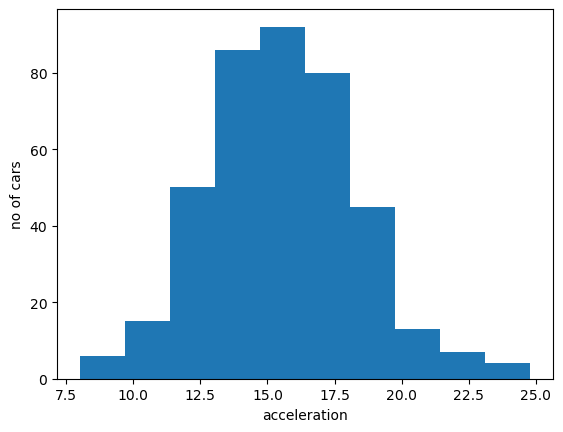

In [83]:
#Histogram
plt.hist(df.acceleration)
plt.xlabel("acceleration")
plt.ylabel("no of cars")
plt.show()

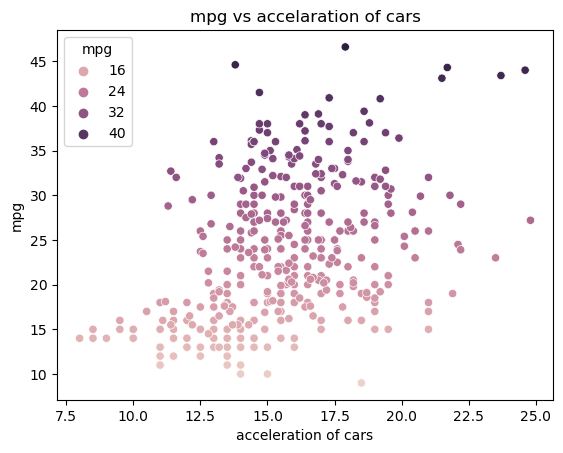

In [84]:
#Scatterplot
sns.scatterplot(x="acceleration",y="mpg" ,data=df,hue="mpg")
plt.xlabel("acceleration of cars")
plt.ylabel("mpg")
plt.title("mpg vs accelaration of cars")
plt.show()

may be data is not so correct thats way it's showing positive correlation

### model_year

In [85]:
df.model_year.describe()

count    398.000000
mean      76.010050
std        3.697627
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

In [86]:
df.model_year.value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64

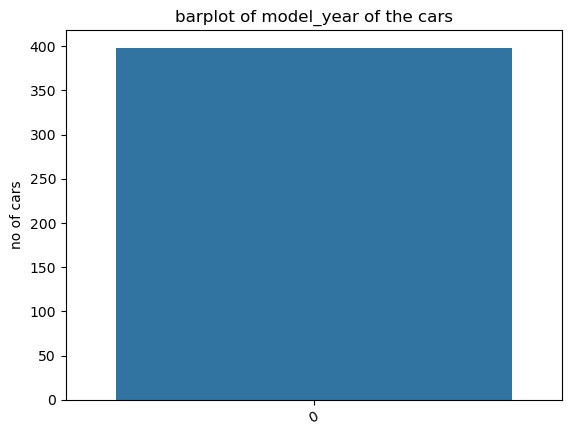

In [87]:
#barplot
sns.countplot(df.model_year)
plt.title("barplot of model_year of the cars")
plt.ylabel("no of cars")
plt.xticks(rotation=25)
plt.show()

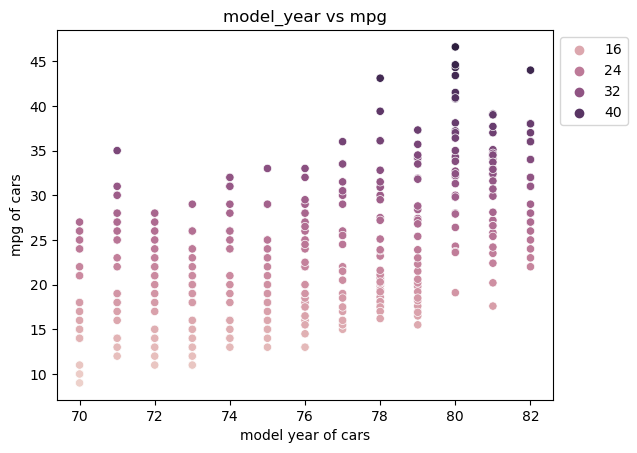

In [88]:
#Scatterplot
sns.scatterplot(x="model_year",y="mpg" ,data=df,hue="mpg")
plt.xlabel("model year of cars")
plt.ylabel("mpg of cars")
plt.title("model_year vs mpg")
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

**The above figure tells that when model_years keep on increases  mileage of vehicles also keep on increases.**

### Origin

In [89]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [90]:
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [91]:
df.origin.value_counts().sum()

398

In [92]:
#barplot
sns.countplot(df.origin)
plt.ylabel("no of car")
plt.show()

ValueError: could not convert string to float: 'usa'

In [ ]:
#mpg vs Origin
df.groupby("origin")["mpg"].mean().plot(kind="bar",color=["#8f1402","#014d4f","#4b006e"])
plt.xlabel("origin")
plt.ylabel("Average_mpg")
plt.title("Average mpg according to Origin")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# If you want to print the numbers you can print 
df.groupby("origin")["mpg"].mean()

**By seeing the above graph we can conclude that the average mileage of cars in Europe is 20.89,the average mileage of cars in Japan is 30.45,the average mileage of cars USA is 20.08.**

### Name

In [ ]:
#Statistical description
df.name.describe()

In [ ]:
# their are almost all the unique names so its not a good predictor so will drop it will building the model

In [ ]:
# to get correlation values on heat map
sns.heatmap(df.corr(),annot=True)
plt.show()

In [93]:
# correlation of target variable with predictor variables
df.corr()['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.777782
weight         -0.831741
acceleration    0.420289
model_year      0.579267
Name: mpg, dtype: float64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


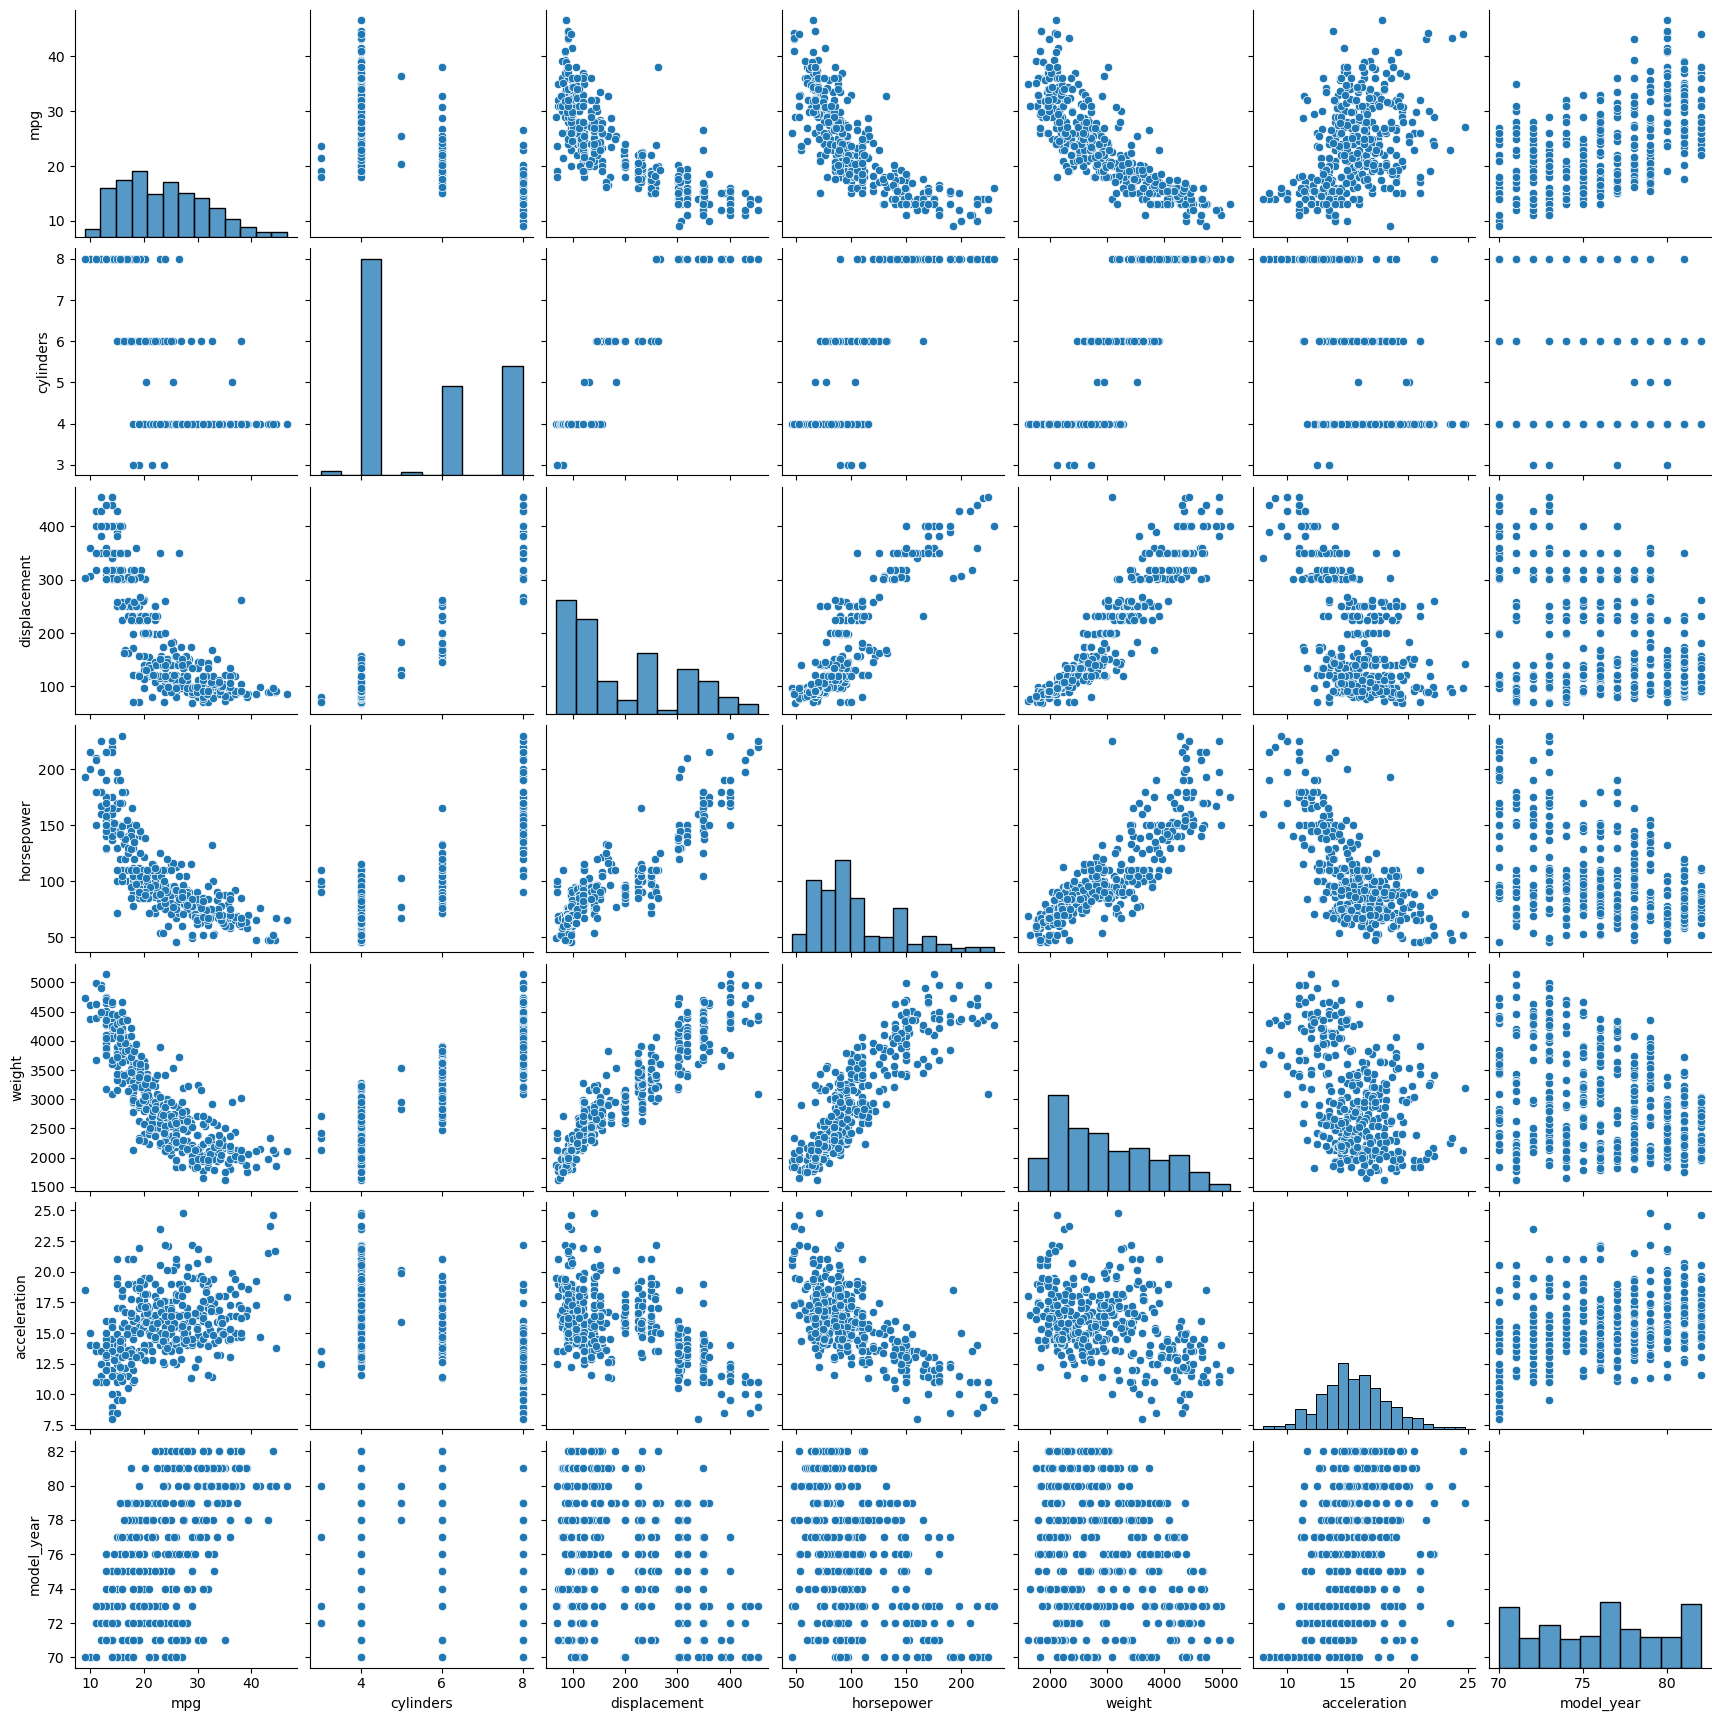

In [95]:
sns.pairplot(df)
plt.show()

In [96]:
# droping the name because its not a good predictor
df.drop('name',axis=1,inplace=True)

In [97]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [98]:
df.shape

(398, 8)

**Backup the dataset.**

In [99]:
new_df=df.copy(deep=True)

### Feature Selection technique

In [100]:
# Now will perform encoding to convert categorical data in to numbers
df.replace({"europe":1,"japan":2,"usa":3},inplace=True)

In [101]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,3
1,15.0,8,350.0,165.0,3693,11.5,70,3


### Separate the dataframe into X and y

In [102]:
y=df["mpg"]
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [103]:
X=df.drop("mpg",axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,3
1,8,350.0,165.0,3693,11.5,70,3
2,8,318.0,150.0,3436,11.0,70,3
3,8,304.0,150.0,3433,12.0,70,3
4,8,302.0,140.0,3449,10.5,70,3


In [104]:
#loading the library for spliting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=14)

In [105]:
#standardising the data
from sklearn.preprocessing import StandardScaler

sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [106]:
print("X_train shape=",X_train.shape)
print("X_test shape=",X_test.shape)
print("y_train shape=",y_train.shape)
print("y_test shape=",y_test.shape)

X_train shape= (318, 7)
X_test shape= (80, 7)
y_train shape= (318,)
y_test shape= (80,)


In [107]:
# after standartizing build the model
# building the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [108]:
from sklearn.metrics import r2_score,mean_squared_error

In [109]:
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
print("mse_train=",mse_train)
print("mse_test=",mse_test)

mse_train= 10.593098928618074
mse_test= 12.569244574208545


In [110]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)

rmse_train =  3.254704123052981
rmse_test =  3.5453130431893523


In [111]:
train_score=r2_score(y_train,y_train_pred)
test_score=r2_score(y_test,y_test_pred)
print("train_score=",train_score)
print("test_score=",test_score)

train_score= 0.824998626033737
test_score= 0.7990112279320258


we can conclude that it give good accuracy in LinearRegression algorithm and it is a generalized model.

### Conclusion statement

**If the MPG of a car is 18.0 then by using my model  can say that the Mileage of the car will range between 14.46 to 21.54 with 95% confident interval.**